In [1]:
%matplotlib widget
from EventDisplay import EvDisp
from EventDisplay import list_entries

In [2]:
# Default run
run=18492
subrun=190
event=9545

In [3]:
# print list of 10 entries
list_entries('slim', sliced = True, slice_val = 10)
#list_entries('mc') # prints all events

Event: 9545, Subrun: 190, Run: 18492
Event: 406, Subrun: 8, Run: 17201
Event: 7353, Subrun: 147, Run: 15227
Event: 4358, Subrun: 87, Run: 16042
Event: 2463, Subrun: 49, Run: 14290
Event: 1350, Subrun: 26, Run: 15892
Event: 2543, Subrun: 50, Run: 14779
Event: 4854, Subrun: 97, Run: 17851
Event: 2940, Subrun: 58, Run: 14770
Event: 3405, Subrun: 68, Run: 14770
Event: 3983, Subrun: 79, Run: 15339


No such event found! Please check that such an event exists.
Displaying event: 9545, subrun: 190, run: 18492
<HDF5 group "/image2d/wire" (1 members)>


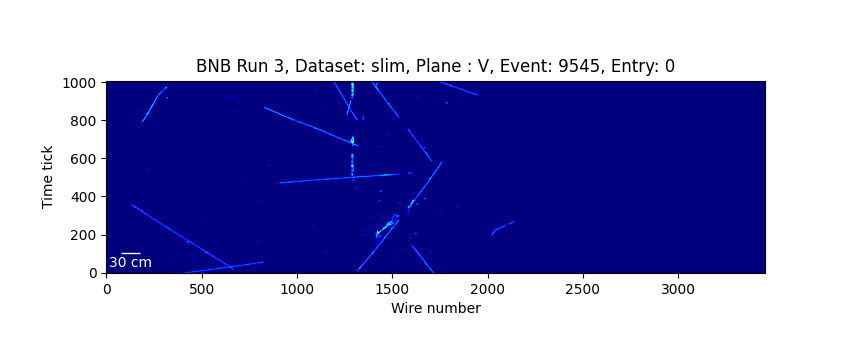

In [4]:
# EvDisp will plot the events
# EvDisp(run, subrun, event, plane, data_file)


# Planes 0,1,2 -> U,V,W
EvDisp(run,subrun,event,1,'slim')

Button(description='Back Event', style=ButtonStyle())

Button(description='Next Event', style=ButtonStyle())

<HDF5 group "/image2d/wire" (1 members)>


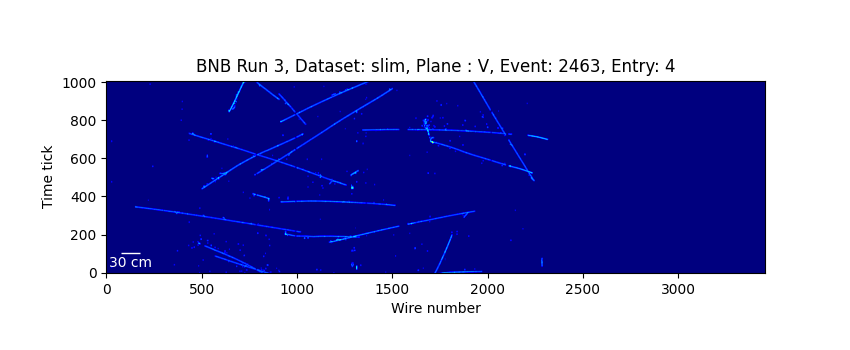

In [6]:
import h5py
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm 
import numpy as np
import matplotlib.colors as colors
import ipywidgets as widgets
from IPython.display import display, clear_output

# Keeping track of the current event index
current_index = 0

# Function to update the display
def update_display(event_index):
    # Clear the previous output
    clear_output(wait=True)
    
    # Display the buttons again (since we cleared the output)
    display(back_button, next_button)
    
    # Get the next event info and display the event
    run, subrun, event = event_id_list[event_index][3], event_id_list[event_index][2], event_id_list[event_index][1]
    EvDisp(run, subrun, event, plane=1, dataset='slim')

# Button click event to move to the next event
def on_next_button_clicked(b):
    global current_index
    current_index += 1
    if current_index >= len(event_id_list):
        current_index = 0  # Loop back to the beginning if we reach the end
    update_display(current_index)


def DatasetSelector(dataset):
    file='none'
    if(dataset == 'mc'):
        file='bnb_run3_mc_larcv.h5'
    elif(dataset == 'data'):
        file='bnb_run3_open_data_larcv.h5'
    elif(dataset == 'dirt'):
        file='bnb_run3_dirt_larcv.h5'
    elif(dataset == 'ext'):
        file='bnb_run3_ext_larcv.h5'
    elif(dataset == 'slim'):
        file='bnb_run3_mc_larcv_slimmed.h5'
    else:
        print('Error, wrong dataset input')
    return file 



# Button click event to move to the previous event
def on_back_button_clicked(b):
    global current_index
    current_index -= 1
    if current_index < 0:
        current_index = len(event_id_list) - 1  # Loop to the last event if we go before the first
    update_display(current_index)

# Buttons widgets
next_button = widgets.Button(description="Next Event")
back_button = widgets.Button(description="Back Event")

# Link the buttons to their respective callback functions
next_button.on_click(on_next_button_clicked)
back_button.on_click(on_back_button_clicked)

# Loading the dataset
dataset = 'slim'
base_dir = "data/"
input_file = base_dir + DatasetSelector(dataset)
f = h5py.File(input_file, 'r')
event_id_list = f['eventid']

# Display the buttons and the first event
display(back_button, next_button)
update_display(current_index)
